In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [21]:
def count(number,array):
    k = 0
    for i in array:
        if i == number:
            k += 1
    return k

def analytic_walk(x,N):
    if abs(x)>N:
        return 0
    if (x+N)%2==1:
        return 0
    return np.math.factorial(N)/np.math.factorial(int((x+N)/2))/np.math.factorial(N-int((x+N)/2))*2**(-N)
    

def numeric_walk(n,N):
    y=[]
    for i in range(n):
        k = 0
        for j in range(N):
            r=random.randrange(0,2)
            if r==0:
                k += 1
            else:
                k += -1
        y.append(k)
    return y


def plot_walk(n,N):
    y = numeric_walk(n,N)
    avg = np.average(y)
    sigma = np.sqrt(np.average((y-avg)**2))
    X = np.arange(-N,N+1)
    Y = [count(l,y) for l in X]
    Z = [analytic_walk(l,N) for l in X]
    for v in range(len(X)):
        plt.vlines(X[v], ymin=0, ymax=Y[v]/np.sum(Y),color='b',linewidth=4)
    plt.plot(X,Y/np.sum(Y),alpha=0,label='N = %d'%N)
    plt.plot(X,Z,alpha=0,label='%d runes'%n)
    plt.vlines(X[0], ymin=0, ymax=Y[0]/np.sum(Y),color='b',linewidth=4, label='Numeric values')
    plt.plot(X,Z,alpha=0,label="Analytic  \u03BC = 0")    
    plt.plot(X,Y/np.sum(Y),alpha=0,label="Numeric \u03BC = %.3f"%avg)
    plt.plot(X,Z,alpha=0,label="Analytic  \u03C3 = %.3f"%np.sqrt(N))
    plt.plot(X,Y/np.sum(Y),alpha=0,label="Numeric \u03C3 = %.3f"%sigma)
    plt.plot(X,Z,'ko',label='Analytic values')
    plt.legend()
    plt.ylabel('Probability')
    plt.xlabel('x')
    plt.grid(linestyle='--')
    plt.xticks(np.arange(-N,N+1,int(N/2)))
    #plt.savefig("Random_walk_%d.pdf"%N, bbox_inches='tight')
    plt.show()
    
def plot_sigma(n_max,N,steps=5):
    X = np.arange(1,n_max+1,steps)
    Y = [np.sqrt(np.average((numeric_walk(i,N)-np.average(numeric_walk(i,N)))**2)) for i in X]
    plt.plot(X,Y,alpha=0,label='N = %d'%N)
    plt.hlines(np.sqrt(N), xmin=1, xmax=n_max,color='k',label='Analytic values')
    plt.plot(X,Y,'bo',label='Numeric values')
    plt.legend()
    plt.ylabel('\u03C3')
    plt.xlabel('runs')
    plt.grid(linestyle='--')
    plt.show()

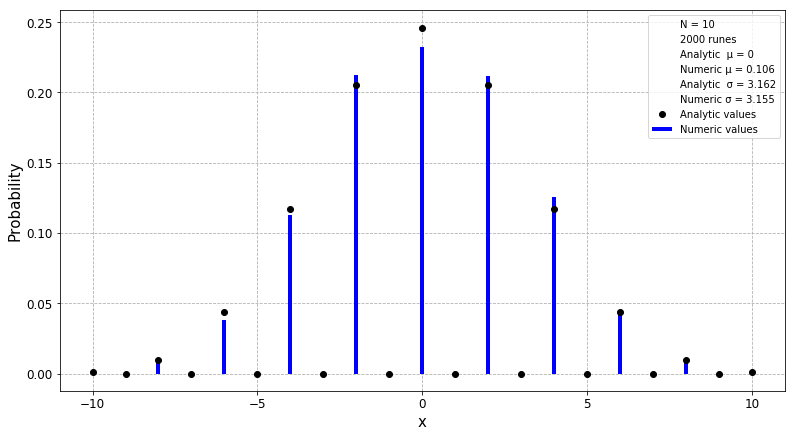

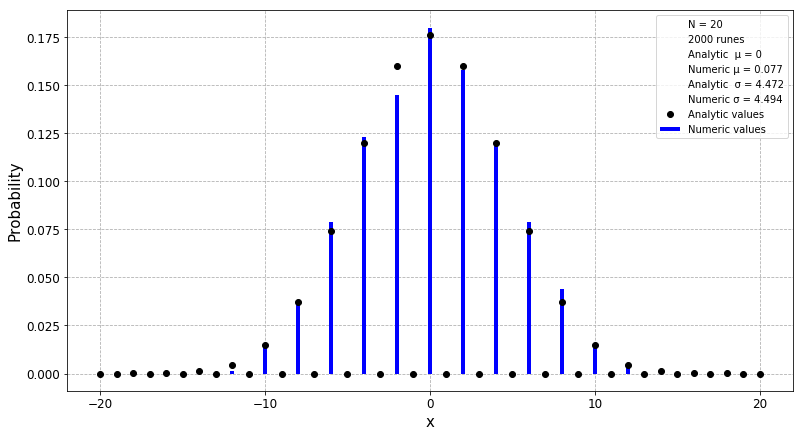

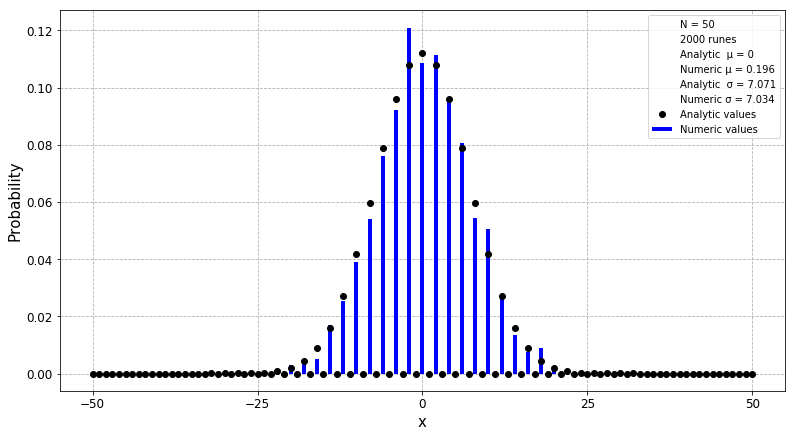

In [22]:
plt.rc('figure', figsize=[13,7])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title
plot_walk(2000,10)
plot_walk(2000,20)
plot_walk(2000,50)

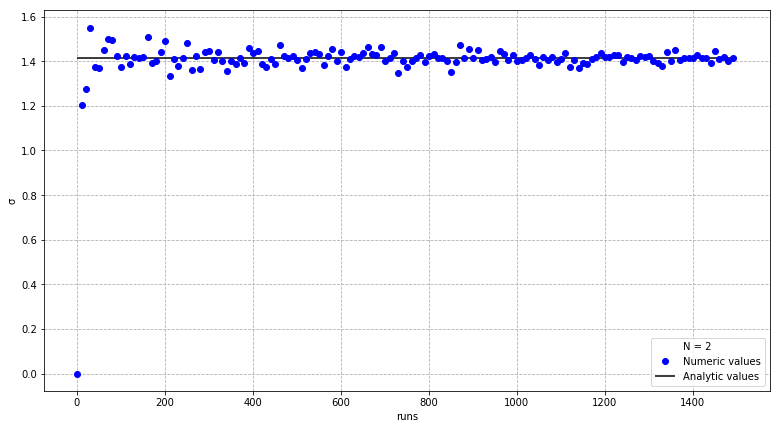

In [169]:
plot_sigma(1500,2,10)